In [1]:
include("../ntl.jl")
import Random

using LinearAlgebra
Random.seed!(3)

dirichlet_scale = ones(Float64, 10)
data_parameters = Ntl.Models.MultinomialParameters(10, dirichlet_scale)

psi_prior = Vector{Float64}([1, 1])
phi_prior = Vector{Float64}([1, 1])
geometric_arrival = Ntl.Models.GeometricArrivals(prior=phi_prior, sample_parameter_posterior=true)
ntl_cluster_parameters = Ntl.Models.NtlParameters(psi_prior, geometric_arrival)

mixture_model = Ntl.Models.Mixture(ntl_cluster_parameters, data_parameters)
n = 4
mixture = Ntl.Generate.generate(mixture_model, n=n)
data = Matrix(transpose(Matrix(mixture[:, 2:end])))
training_data = data[:, 1:n]
true_clustering = mixture[:, 1]
true_number_of_clusters = length(unique(true_clustering))

2

In [2]:
ntl_cluster_parameters = Ntl.Models.NtlParameters(psi_prior, geometric_arrival)
gibbs_sampler = Ntl.Samplers.GibbsSampler(num_iterations=1000000, num_burn_in=100000, skip=1,
                                          assignment_types=["all same cluster"])
gibbs_output = Ntl.Fitter.fit(training_data, mixture_model, gibbs_sampler)

Progress: 100%|█████████████████████████████████████████| Time: 0:01:141:41


Dict{String, Array} with 3 entries:
  "assignments"       => [1 1 … 1 1; 1 1 … 1 2; 3 1 … 1 1; 3 4 … 4 4]
  "arrival posterior" => [0.450617; 0.624191; … ; 0.732394; 0.730953]
  "log likelihood"    => [-96.4795; -93.4268; … ; -93.4268; -94.0316]

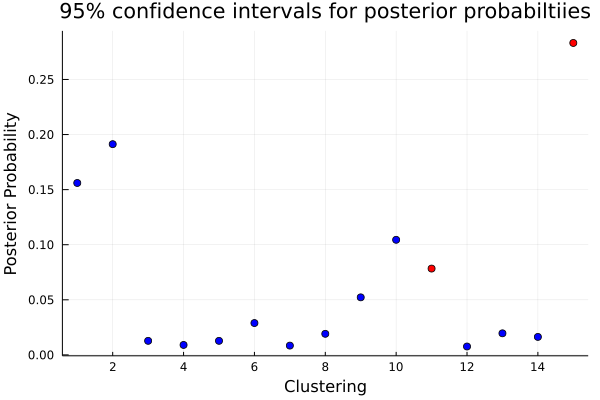

In [6]:
Ntl.Plot.plot_clustering_posterior_probability_validation(
    gibbs_output["assignments"][:, :, 1], 
    data, 
    mixture_model,
    title="95% confidence intervals for posterior probabiltiies"
)

In [4]:
metropolis_hastings_sampler = Ntl.Samplers.MetropolisHastingsSampler(num_iterations=1000000, num_burn_in=100000, proposal_radius=100, skip=1, adaptive=false,
                                                                     assignment_types=["random"])
mcmc_output = Ntl.Fitter.fit(training_data, mixture_model, metropolis_hastings_sampler) 

Progress: 100%|█████████████████████████████████████████| Time: 0:00:43


Dict{String, Array} with 3 entries:
  "assignments"       => [1 1 … 1 1; 2 1 … 2 2; 1 1 … 2 1; 4 4 … 1 4]
  "arrival posterior" => [0.635056; 0.468878; … ; 0.751324; 0.563182]
  "log likelihood"    => [-94.0316; -93.4268; … ; -96.5485; -94.0316]

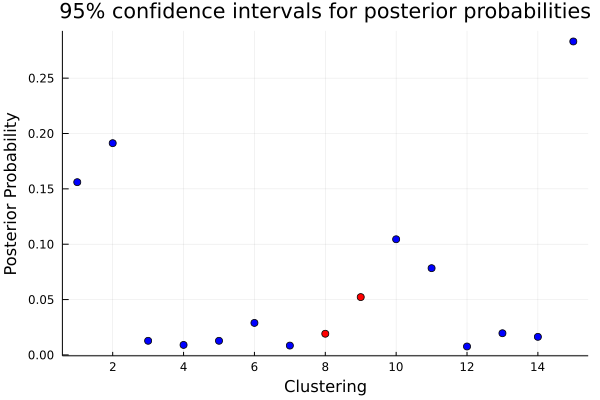

In [7]:
Ntl.Plot.plot_clustering_posterior_probability_validation(
    mcmc_output["assignments"][:, :, 1], 
    data, 
    mixture_model,
    title="95% confidence intervals for posterior probabilities")